# Decision Trees 🌲🌳🌴

In [30]:
# The solutions and notes to filling out the notebook that is linked in the encounter_notes. 


In [1]:
#import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (12, 6)

### 1. Load the data

In [2]:
df = pd.read_csv("penguins_simple.csv", sep=";")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.7+ KB


In [3]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


<div class="alert alert-info">Our task today: predict the species of a penguin </div>

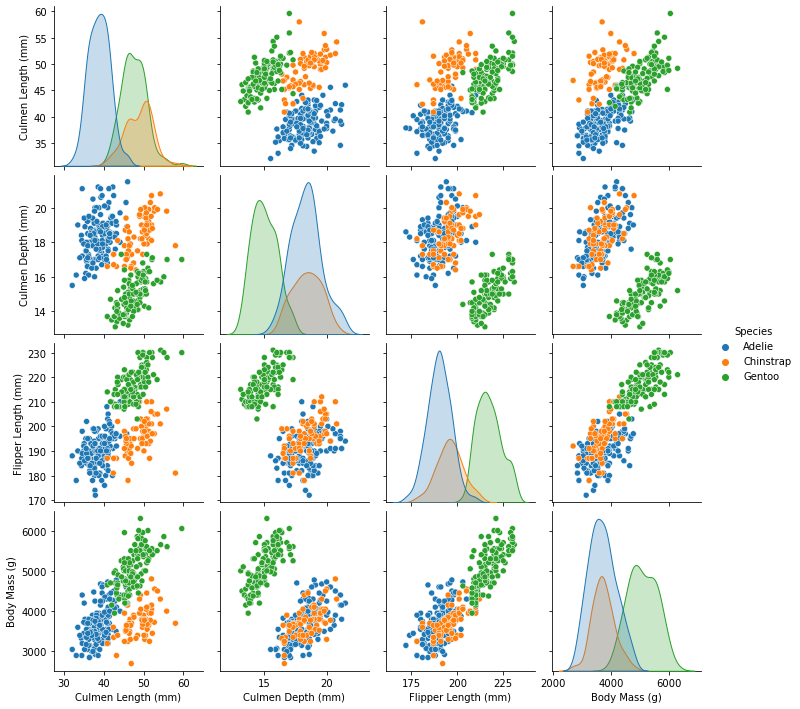

In [4]:
sns.pairplot(df, hue="Species")

In [7]:
# We are going to go through the workflow we've learned#

### ... and assign X and y: 

In [9]:
y = df['Species']

In [10]:
# we start with two features again
X = df[['Culmen Length (mm)', 'Body Mass (g)']]

In [12]:
y.shape, X.shape

((333,), (333, 2))

In [38]:
##### Not in the notebook in CM, but adhering to our workflow, lets do a: 

### 2. Train-test-split

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=42)

In [14]:
Xtrain.shape, Xtest.shape, ytrain.shape

((249, 2), (84, 2), (249,))

### 3. Plot the data

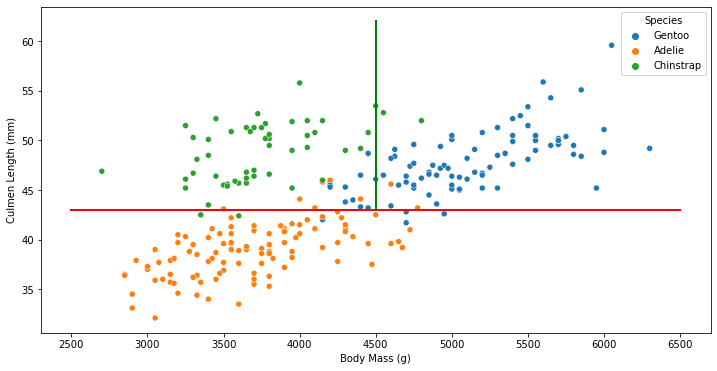

In [16]:
sns.scatterplot(x=Xtrain["Body Mass (g)"], y=Xtrain["Culmen Length (mm)"], hue=ytrain)
plt.plot([2500, 6500], [43,43], linewidth=2, color ='red')
plt.plot([4500, 4500], [43,62], linewidth=2, color ='green')

## Decision Tree from Scratch

#### 4. Make one prediction for every penguin

In [43]:
# before looking at the code: 
# think about a rule, when a penguin is likely to be an Adelie-penguin by looking at the graph.
# We want to partition this plot into different regions.

In [44]:
# once wehave one partition: we can treat each resulting region/node as a new problem space, 
# where you can ask a new question. 

In [17]:
predictions = []   #list of ypred
for idx, row in Xtrain.iterrows(): # idx row: values of a row as a pd.Series (with column-names as index)  
    if row["Culmen Length (mm)"] < 43:
        predictions.append('Adelie')
    else:
        if row["Body Mass (g)"] < 4500: 
            predictions.append("Chinstrap")
        else: 
            predictions.append("Gentoo")

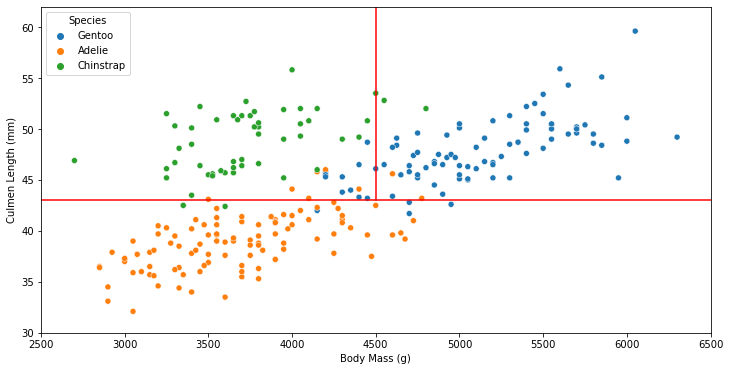

In [18]:
sns.scatterplot(x=Xtrain["Body Mass (g)"], y=Xtrain["Culmen Length (mm)"], hue=ytrain)
plt.axis((2500, 6500, 30, 62))
plt.plot([2500, 6500],[43,43], color="red") #horizontal
plt.plot([4500, 4500],[43, 62],color="red") #top

In [19]:
predictions

['Gentoo',
 'Gentoo',
 'Adelie',
 'Gentoo',
 'Gentoo',
 'Chinstrap',
 'Gentoo',
 'Gentoo',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Gentoo',
 'Gentoo',
 'Adelie',
 'Gentoo',
 'Adelie',
 'Gentoo',
 'Gentoo',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Gentoo',
 'Adelie',
 'Chinstrap',
 'Chinstrap',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Gentoo',
 'Adelie',
 'Adelie',
 'Gentoo',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Gentoo',
 'Chinstrap',
 'Gentoo',
 'Adelie',
 'Chinstrap',
 'Gentoo',
 'Adelie',
 'Gentoo',
 'Chinstrap',
 'Gentoo',
 'Chinstrap',
 'Gentoo',
 'Gentoo',
 'Chinstrap',
 'Chinstrap',
 'Gentoo',
 'Adelie',
 'Chinstrap',
 'Gentoo',
 'Chinstrap',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Chinstrap',
 'Adelie',
 'Gentoo',
 'Gentoo',
 'Gentoo',
 'Chinstrap',
 'Gentoo',
 'Gentoo',
 'Chinstrap',
 

#### 5. Calculate the accuracy of the model

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(ytrain, predictions)

0.8875502008032129

In [51]:
 # -> no "Learning" yet! Only follows rules that we gave it. 
    #And we adjusted these boundaries by hand (by guessing what a better split would be) and
    # check if we get a better accuracy.
# But: hard to estimate, what a better split is.

## ... but is there a better way than guessing?

Yes! It's called **Gini-Impurity!** Number of Penguins at area B although they belong to A.   
It can be used to measure how good our split is -> how "pure" the resulting nodes are.

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.scatterplot(x=Xtrain["Body Mass (g)"], y=Xtrain["Culmen Length (mm)"], hue=ytrain, s=150)
plt.axis((3910, 4390, 40, 48))
plt.plot([3910, 4390],[43.5,43.5], linewidth=2, color="red") #horizontal
plt.plot([4220, 4220],[0,43.5], linewidth=1, color="red") #bottom
plt.plot([4165, 4165],[43.5,48], linewidth=1, color="red") #top

GINI =  $\sum\nolimits_{k=1}^K$(p$_{k}$(1 - p$_{k}$)

K = classes (The number of areas that we have separated the samples-here it is K=3), 
p = Proportion of points belonging to class k

In [54]:
#For the bottom left node:  
#2 Classes (K)
#9 penguins total
#8 orange,  
#1 blue penguins,   

In [21]:
p1 = 8/9   # p_orange
p2 = 1/9    # p_blue

In [22]:
gini1 = (p1 * (1-p1)) + (p2 * (1- p2))
gini1

0.1975308641975309

In [23]:
#Interpretation: 
#    pure node: 0
#    the lower the gini, the better the split.
    #    (two classes: worst Gini 0.5)
    #    (three classes: 0.6)

In [24]:
#Bottom right:  #Best Case
gini2 = 0

In [25]:
#Upper left:  
p3 = 1/2
p4 = 1/2

In [26]:
gini3 = (p3 * (1-p3)) + (p4 * (1- p4))
gini3   #worst possible with wo classes

0.5

In [27]:
#Upper right: 
p5 = 6/7
p6 = 1/7

In [28]:
gini4 = (p5 * (1-p5)) + (p6 * (1- p6))
gini4

0.24489795918367352

In [29]:
# this was calculating the Gini for each node. But if we want to evaluate how good a split is /e.g. the vertical line on the top: 
# we take the weighted average of the gini of the two nodes that we get. 
#upper_left_node = 4/11
#upper_right_node = 7/11
# gini_k * corresponding weight() + gini_k+1  * corresponding weight() + ...
gini3*(4/11)  + gini4*(7/11)

0.33766233766233766

In [64]:
# and then we can move the line around and see where we get the best gini-score. 

In [65]:
# This is what our model will do: it will move around the lines until it finds the best splits. 

## Luckily, there is a Decision Tree Model in Sklearn that will do all the hard work for us!

...and it finds the optimal questions and separations using the **CART Algorithm**: 

#### How does the Algorithm work?   

1. For each feature, determine the best threshold for splitting
2. Determine the best feature-threshold pair
3. Create two child nodes
4. Split the data points across child nodes
5. For each node, start again from 1.
6. If subset is pure or max_depth is reached STOP

#### Train the model

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
m = DecisionTreeClassifier(max_depth=2)  # hyperparameter : max_depth: how many levels of branches I want.
m.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=2)

In [69]:
# What would overfitting look like? Each sample has its own node. 
# Talk a bit about the hyperparameters. This is how we regularize our model. e.g. min leaf size, max depth,...

#### Make predictions

In [32]:
ypred = m.predict(Xtrain)

In [33]:
m.predict(Xtrain)

array(['Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
  

In [34]:
m.score(Xtrain, ytrain)  

0.927710843373494

In [74]:
#m.predict_proba(Xtrain)  
# all the same probability for samples in the same node. More like a "confidence value" based on class frequencies in the node.
# fraction of samples of the same class in a leaf -> adds up to 1.

In [75]:
# There is always randomness in a Decision Tree (as it is implemented by sklearn): from the docu: 
"""random_state : int, RandomState instance or None, default=None
    Controls the randomness of the estimator. The features are always
    randomly permuted at each split, even if ``splitter`` is set to
    ``"best"``. When ``max_features < n_features``, the algorithm will
    select ``max_features`` at random at each split before finding the best
    split among them. But the best found split may vary across different
    runs, even if ``max_features=n_features``. That is the case, if the
    improvement of the criterion is identical for several splits and one
    split has to be selected at random. To obtain a deterministic behaviour
    during fitting, ``random_state`` has to be fixed to an integer.
    See :term:`Glossary <random_state>` for details."""

'random_state : int, RandomState instance or None, default=None\n    Controls the randomness of the estimator. The features are always\n    randomly permuted at each split, even if ``splitter`` is set to\n    ``"best"``. When ``max_features < n_features``, the algorithm will\n    select ``max_features`` at random at each split before finding the best\n    split among them. But the best found split may vary across different\n    runs, even if ``max_features=n_features``. That is the case, if the\n    improvement of the criterion is identical for several splits and one\n    split has to be selected at random. To obtain a deterministic behaviour\n    during fitting, ``random_state`` has to be fixed to an integer.\n    See :term:`Glossary <random_state>` for details.'

## Plot the tree

In [35]:
from sklearn.tree import plot_tree

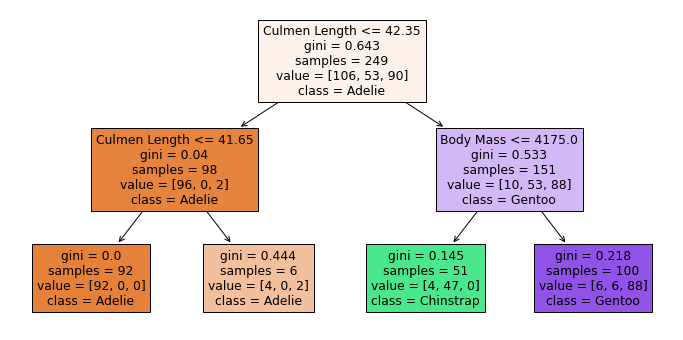

In [39]:
t = plot_tree(m, feature_names=["Culmen Length","Body Mass"], class_names=["Adelie", "Chinstrap", "Gentoo"], filled=True)

# THe last groups that appear in the Leaf mode are 4 different islands/groups in the plot of Mass vs Culmen length. As we increase the 

### Check what is happening if I have depth = 3!

In [42]:
m2 = DecisionTreeClassifier(max_depth=3)
m2.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

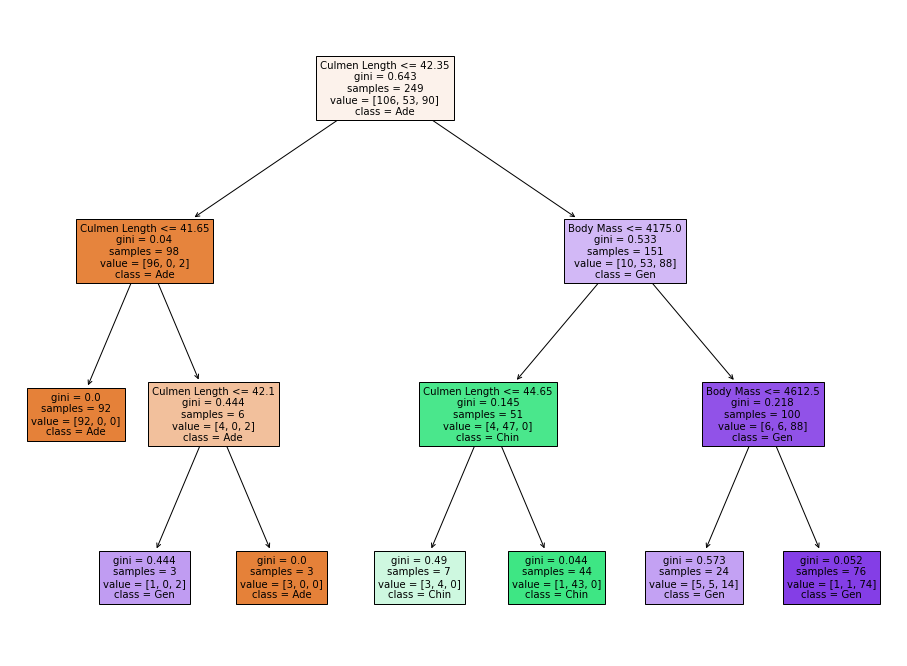

In [43]:
plt.figure(figsize=(16, 12))
t2 = plot_tree(m2, feature_names = ["Culmen Length","Body Mass"], class_names=["Ade", "Chin", "Gen"], filled=True)

In [44]:
m.feature_importances_ # gives the importance of the feature that answers the question. Here the Culmen length is more important than the mass. 

array([0.60028267, 0.39971733])

In [45]:
# what is the order? As we give the features to the model. 
list(zip(m.feature_importances_, Xtrain.columns))

[(0.600282672846503, 'Culmen Length (mm)'),
 (0.3997173271534968, 'Body Mass (g)')]

In [83]:
#Why is it splitting the left inner node again? 
#-> to be more certain
#-> the Algorithm wants to split until the nodes are pure

### When should I use a Decision tree? 
In general, there is a Classification Tree-model and one for Regression in sklearn.     
But: Decision Trees on their own are usually not great -> better: Random Forest. 

**Advantages:** 
- intuitive understanding, can be visualized
- requires little data preparation (e.g. no normalization)

**Disadvantages:**
- prone to overfitting (especially with large number of features)  
- unstable on their own  (if I change sth in the first data set (even rows) then the result is totally different) 

In [ ]:
# now we spent the whole evening on these trees and now I am telling you they basically suck.. 
# BUT: they can be made a lot better if we let them work together. And we see how that works tomorrow.